# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. `Pandas` и `Seaborn`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 4 балла
* Задача 2 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 5 баллов
* Задача 4 &mdash; 3 балла
* Задача 5 &mdash; 8 баллов

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие. Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv` со следующими полями:
* `school` &mdash; номер школы;
* `test_score` &mdash; результат одного ученика из этой школы;
* `number_of_students` &mdash; кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

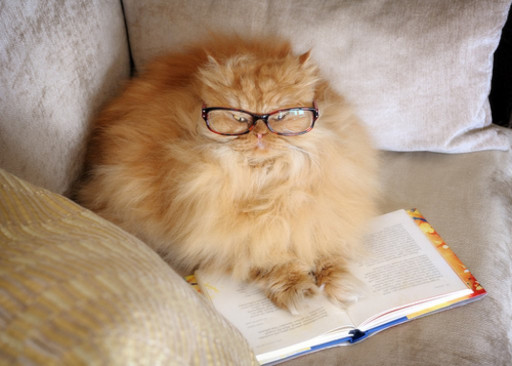

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

*Подсказка.* Это можно сделать с помощью методов  <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [114]:
cat_df = pd.read_csv("cat_exam_data.csv")
cat_df.head()

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [115]:
cat_df.isna().sum()

school                  0
test_score            204
number_of_students      0
dtype: int64

Как видим пропуски есть только в столбце `test_score`

In [116]:
cat_df = cat_df.dropna(how='any') # drops nan values
cat_df.isna().sum() # checks if all nan values were dropped

school                0
test_score            0
number_of_students    0
dtype: int64

Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции.

In [117]:
cat_df.describe()

,school,test_score,number_of_students
count,501358.000000,501358.000000,501358.000000
mean,250.096795,51.681788,1088.910569
std,144.428420,14.179981,281.016801
min,0.000000,0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


Отдельного внимания заслуживает среднее. Какими способами его можно посчитать? Произведите вычисления и *подробно* проинтерпретируйте результаты. Что стоит публиковать в официальной статистике?

In [118]:
cat_df.mode()

,school,test_score,number_of_students
0,108,52.0,1244


Как мы видим среднее, мода и медиана `test_score` отличаются не сильно. Мода и медиана вообще совпадают, а среднее отличается примерно на 0.3 от них, это значит, что в данных скорее всего не много выбросов, иначе бы разница между медианой и средним была бы сильно больше. А значит в официальных результатах можно было бы опубликовать балл  `52`. Так же хочется отметить что разность между 3-им и 2-ым и 2-ым и 1-ым квартилем почти одинаковая, т.е распределение оценок студентов достаточно симметрично и возникает теория, что похоже на нормальное. Проверим это, построим

In [119]:
import scipy.stats as sps

def check_test_score_pdf():
    x = cat_df['test_score']
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Ядерная оценка плотности',
        fontsize = 18
    )
    axis.grid(ls=':')
    
    sns.distplot(x, rug=True, fit=sps.norm, ax=axis)
    axis.set_xlabel('Балл студента', fontsize=15)
    axis.set_ylabel('Плотность', fontsize=15)
    plt.show()
    return 

/Users/mikhail/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mikhail/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


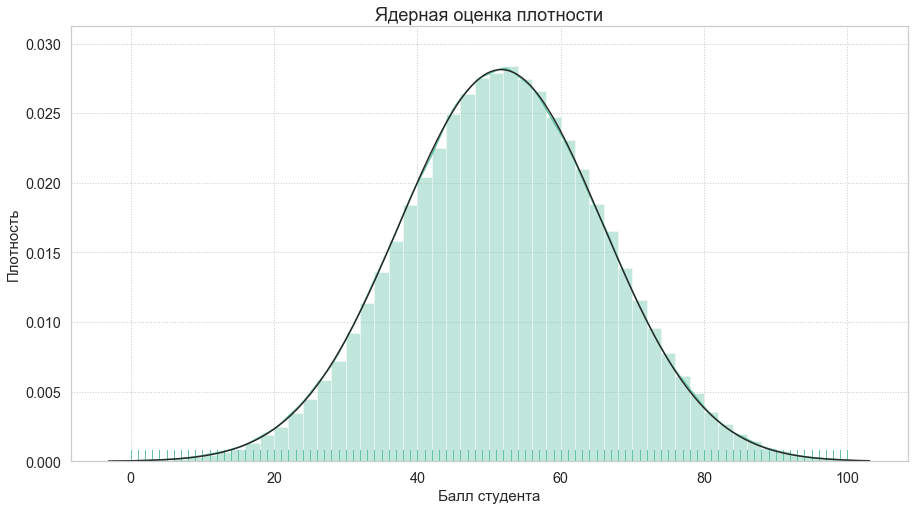

In [120]:
check_test_score_pdf()

Распределение действительно похоже на нормальное. Правда такого задания не было, но все же.

Посчитайте сколько котиков получили 100 баллов.

In [121]:
len(cat_df[cat_df['test_score'] == 100])

51

Выведите подробную информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.
Отсортируйте эти школы по количеству стобалльников.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [122]:
groups = cat_df[cat_df['test_score'] == 100].groupby('school')
info_100 = groups.aggregate({
    'test_score': 'count', 
    'number_of_students': 'last'
})
info_100 = info_100.rename(columns={
    'test_score': 'number of students with 100'
})
info_100 = info_100.sort_values(by='number of students with 100', 
                                ascending=False)

info_100

,number of students with 100,number_of_students
school,,
486,2,800
4,1,1015
395,1,436
302,1,1517
303,1,701
315,1,580
328,1,789
342,1,920
346,1,913


Посчитайте средний результат каждой из школ и посмотрите на результат. Рассматриваем все школы, не только со стобальниками.

*Подсказка.* Может помочь метод <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [123]:
new_groups = cat_df.groupby('school')
mean_info = new_groups.aggregate({
    'test_score': 'mean', 
    'number_of_students': 'last'
})
mean_info = mean_info.rename(columns={
    'test_score': 'mean_test_score'
})
mean_info

,mean_test_score,number_of_students
school,,
0,52.294258,418
1,52.028950,1209
2,51.751451,1035
3,51.566265,1245
4,51.025641,1015
...,...,...
495,50.933275,1139
496,51.146402,1209
497,51.141228,1140


Отсортируйте школы по среднему результату.

In [124]:
mean_info = mean_info.sort_values(
    by='mean_test_score',
    ascending=False
)
mean_info

,mean_test_score,number_of_students
school,,
57,53.341682,560
124,52.993311,598
263,52.982063,669
82,52.981982,555
366,52.970207,773
...,...,...
194,50.406977,774
471,50.362500,960
486,50.325000,800


Посмотрите на топ 10 лучших результатов.

In [125]:
mean_info.head(10)

,mean_test_score,number_of_students
school,,
57,53.341682,560
124,52.993311,598
263,52.982063,669
82,52.981982,555
366,52.970207,773
465,52.957555,1179
169,52.932401,858
449,52.910364,357
477,52.898515,808


**Вывод:** Средний балл за экзамен выше у тех школ, в которых меньше учеников

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим. Посмотрите теперь на 10 худших школ.

In [126]:
mean_info.tail(10)

,mean_test_score,number_of_students
school,,
383,50.716981,636
264,50.702906,929
48,50.690293,649
156,50.641354,1093
394,50.461538,1079
194,50.406977,774
471,50.362500,960
486,50.325000,800
211,50.248571,351


**Вывод:** Ожидания не оправдались, снизу так же школы с количеством студентов $\leq 1100$.

Постройте график зависимости среднего результата ЕКЭ от количества учеников.

In [127]:
def count_students_to_mean():
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Отношение количества студентов в школе к ее среднему результату',
        fontsize = 18
    )
    axis.set_xlabel('Количество студентов в школе', fontsize=15)
    axis.set_ylabel('Среднее количество баллов по школе', fontsize=15)
    axis.grid(ls=':')
    
    axis.scatter(
        mean_info['number_of_students'],
        mean_info['mean_test_score']
    )
    plt.show()
    return 

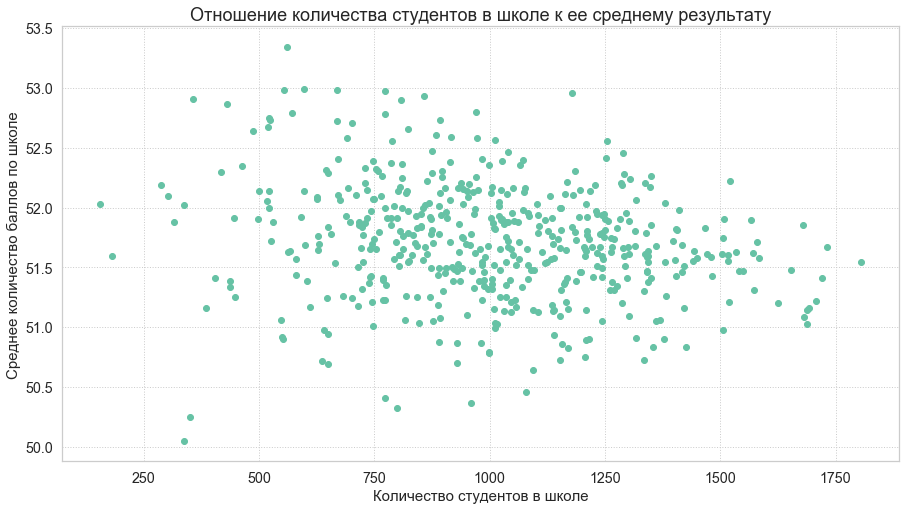

In [128]:
count_students_to_mean()

**Вывод:** Не видно никакой явной связи между количеством учащихся и средним баллом.

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы, получив тем самым два датасета. Будем считать, что школа небольшая, если в ней не более 1000 учеников.

In [129]:
big_schools = mean_info[mean_info['number_of_students'] > 1000]
small_schools = mean_info[mean_info['number_of_students'] <= 1000]
print("Количество маленьких школ:", len(small_schools),
      "Количество больших школ:", len(big_schools))

Количество маленьких школ: 249 Количество больших школ: 251


Заметим, что количество маленьких школ и больших почти одинаковое.

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` &mdash; число бинов гистограммы;
* `alpha=0.5` &mdash; прозрачность бинов.

In [130]:
def hist_schools():
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Гистрограмма среднего балла за экзамен по школам',
        fontsize = 23
    )
    
    axis.hist(
        small_schools['mean_test_score'],
        bins = 10,
        density=False, 
        alpha= 0.5,
        label='Маленькие школы'
    )
    
    axis.hist(
        big_schools['mean_test_score'],
        bins = 10,
        density=False, 
        alpha= 0.5,
        label='Большие школы'
    )
    
    axis.set_xlabel('Средний балл за экзамен', fontsize=20)
    axis.set_ylabel('Количество школ с данным средним баллом', fontsize=18)
    axis.grid(ls=':')
    axis.legend(loc='best')
    plt.show()
    return 

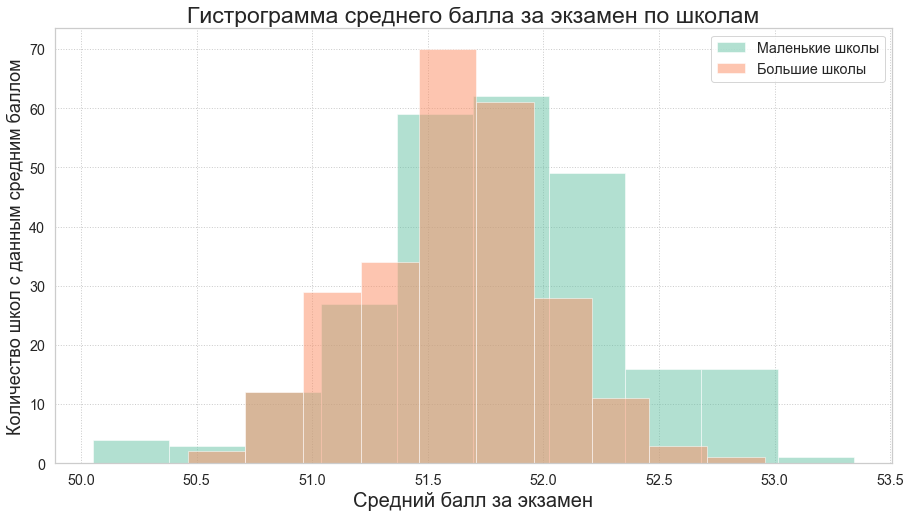

In [131]:
hist_schools()

**Вывод:** Среди больших школ есть много таких, чей средний балл близок к среднему, однако среди них мало школ со средним баллом близким к самому высокому среднему баллу. Среди маленьких же школ большее количество имеет средние баллы близкие к самым высоким. А значит маленькие школы все же лучше.

---

### Задача 2

Задача заключается в работе с данными о трендах на <a target="_blank" href="https://www.youtube.com/">YouTube</a>. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

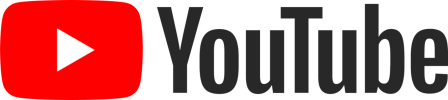


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a target="_blank" href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

*Замечание. Часто считывание дат &mdash; головная боль аналитика.*

In [132]:
parser = lambda date: datetime.strptime(date, '%y.%d.%m')

videos_df = pd.read_csv(
    "RUvideos_short.csv", 
    sep=',', 
    parse_dates=[5],
    converters={'trending_date': parser}
)
videos_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13 09:09:31+00:00,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13 17:32:11+00:00,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13 16:11:31+00:00,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13 06:51:10+00:00,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13 16:52:36+00:00,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` &mdash; дата в формате год-день-месяц;
* `category_id` &mdash; категория видео, названия приведены в файле `RU_category_id.json`;
* `views` &mdash; количество просмотров видео;
* `likes` &mdash; количество лайков;
* `dislikes` &mdash; количество дислайков;
* `comment_count` &mdash; количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у объекта даты. Напечатайте начало таблицы.

In [133]:
columns_left = ['trending_date', 'category_id', 'views',
               'likes', 'dislikes', 'comment_count']
videos_df_cut = videos_df[columns_left].copy()
videos_df_cut.head()

,trending_date,category_id,views,likes,dislikes,comment_count
0,2017-11-14,22,62408,334,190,50
1,2017-11-14,22,330043,43841,2244,2977
2,2017-11-14,24,424596,49854,714,2944
3,2017-11-14,22,112851,3566,122,80
4,2017-11-14,24,243469,36216,631,1692


In [134]:
videos_df_cut['trending_date'] = \
        videos_df_cut['trending_date'].transform(lambda x: x.day)
videos_df_cut.head()

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692


<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

In [135]:
def box_plot(log_scale: bool = False):
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
        
    axis.set_title(
        'Зависимость количества просмотров от дня в трендах',
        fontsize = 23
    )
    
    sns.boxplot(
        x='trending_date',
        y='views',
        data=videos_df_cut
    )
    if log_scale:
        axis.set_yscale('log')
    axis.set_ylabel('Количество просмотров', fontsize=20)
    axis.set_xlabel('День попадания в тренды', fontsize=20)
    plt.show()
    return 

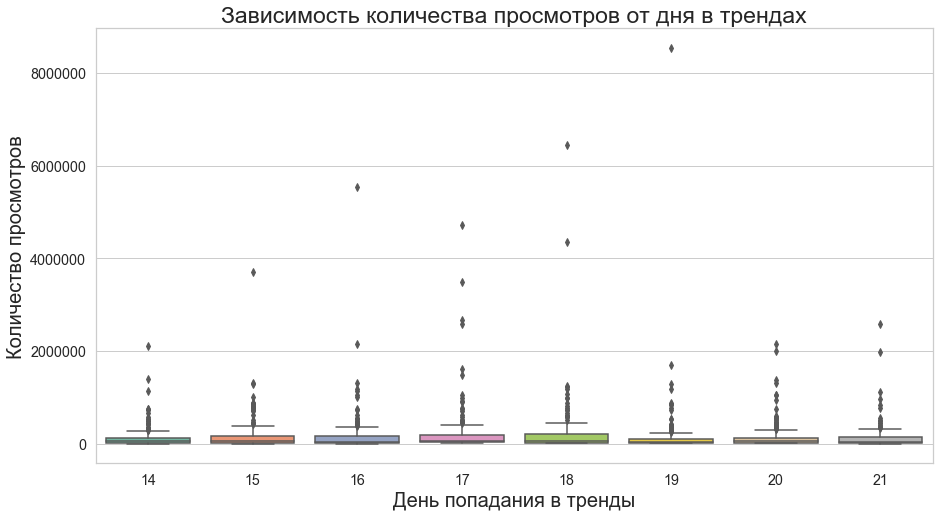

In [136]:
box_plot()

Исправьте этот недостаток, установив некоторое значение. 

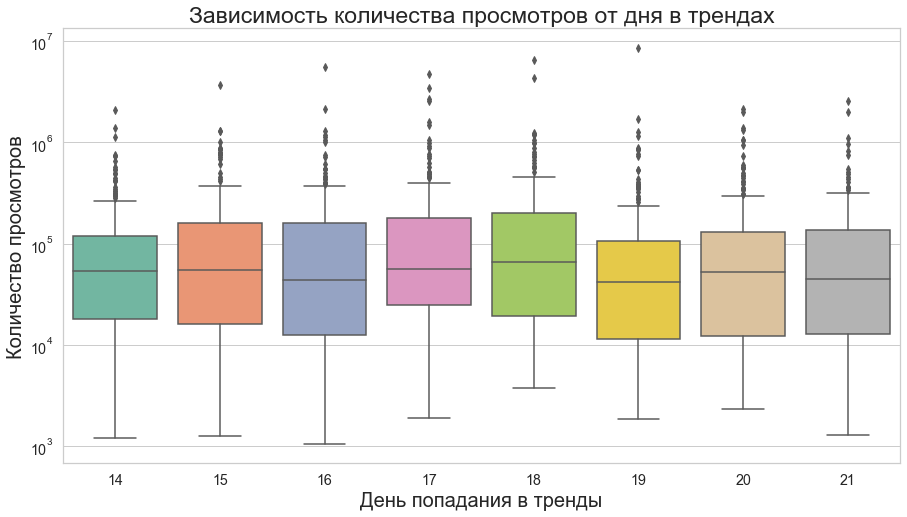

In [137]:
box_plot(log_scale=True)

Постройте `jointplot` по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

In [138]:
def joint_plot(xlim=None, ylim=None):
    if xlim is not None and ylim is not None:
        g = sns.jointplot(
        data=videos_df, 
        x="views",
        y="likes", 
        xlim=XLIMS, 
        ylim=YLIMS, 
        height=9
        )
    else :
        g = sns.jointplot(
            data=videos_df, 
            x="views", 
            y="likes"
        )
    g.plot_joint(sns.scatterplot, color='r')
    g.plot_marginals(
        sns.histplot, 
        kde=False
    )
    g.set_axis_labels(
        xlabel='Количество просмотров',
        ylabel='Количество лайков',
        fontsize=20
    )

    return 

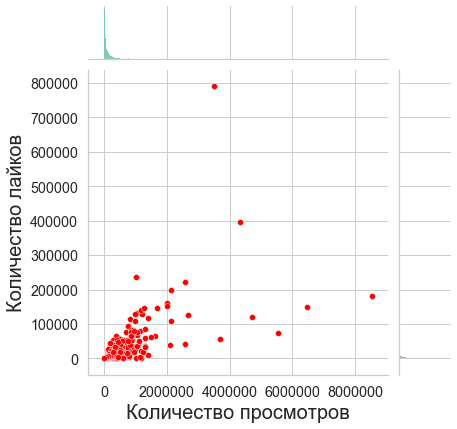

In [139]:
joint_plot()

Исправьте этот недостаток.

In [140]:
XLIMS = (videos_df['views'].min(), videos_df['views'].quantile(0.9))
YLIMS = (videos_df['likes'].min(), videos_df['likes'].quantile(0.9))

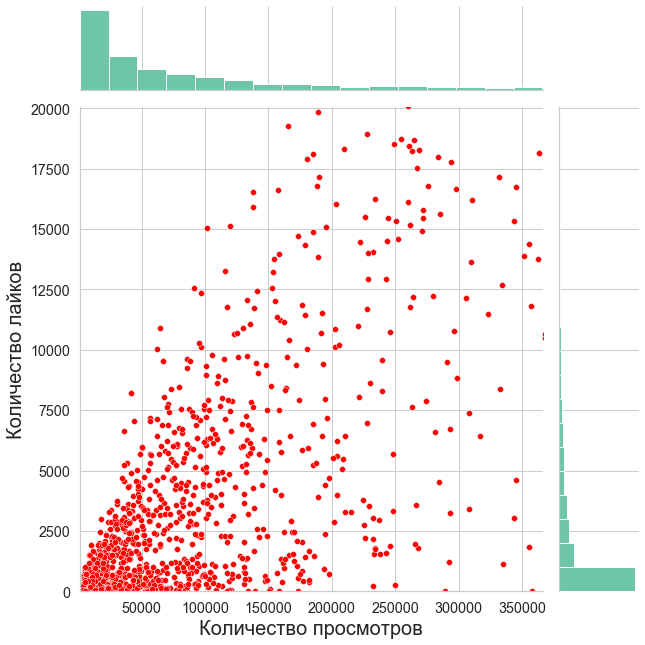

In [141]:
joint_plot(xlim=XLIMS, ylim=YLIMS)


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 3

<a target="_blank" href="https://www.netflix.com">Netflix</a> за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


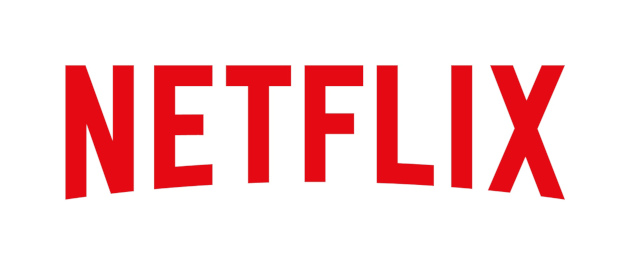

Описание признаков:
* `title` &mdash; название шоу;
* `rating` &mdash; рейтинг шоу. Например: G, PG, TV-14, TV-MA;
* `ratingLevel` &mdash; описание рейтинговой группы и особенностей шоу;
* `release year` &mdash; год выпуска шоу;
* `user rating score` &mdash; оценка пользователей.


Загрузите данные, выполнив код ниже.

In [142]:
netflix_data = pd.read_csv('netflix_data.csv', encoding='cp437')

del netflix_data['ratingDescription'], netflix_data['user rating size']
netflix_data.head()

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0


Удалите из данных дупликаты. Сколько объектов удалено?

In [143]:
before = len(netflix_data)
netflix_data.drop_duplicates(inplace=True)
after = len(netflix_data)
print("Объектов удалено:", before - after)

Объектов удалено: 500


Сколько объектов осталось?

In [144]:
print("Объектов осталось:", after)

Объектов осталось: 500


Есть ли в данных пропуски?

Если да, то при дальнейшем анализе подумайте, как их корректнее обработать. Учтите, что многие методы умеют работать с пропусками.

In [145]:
netflix_data.isna().sum()

title                  0
rating                 0
ratingLevel           33
release year           0
user rating score    244
dtype: int64

Как мы видим в данных имеются пропуски в столбцах `ratingLevel` и `user rating score`.

Сколько рейтинговых групп представлено в данных?

In [146]:
netflix_data.groupby('rating')['title'].count() 

rating
G            53
NR           10
PG           76
PG-13        12
R            14
TV-14       106
TV-G         29
TV-MA        82
TV-PG        33
TV-Y         36
TV-Y7        23
TV-Y7-FV     25
UR            1
Name: title, dtype: int64

In [147]:
rating_groups_count = len(netflix_data['rating'].drop_duplicates())
print("Всего рейтинговых групп", rating_groups_count)

Всего рейтинговых групп 13


Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

In [148]:
def user_rating_hist():
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    axis.set_title(
        'Гистограмма оценок пользователей',
        fontsize = 23
    )
    
    sns.histplot(
        x=netflix_data['user rating score'],
        ax=axis,
        stat='density',
        bins=20)
    axis.set_xlabel("Оценки пользователей", fontsize=18)
    axis.set_ylabel(
        "Доля выставленных оценок",
        fontsize=18
    )
    return 

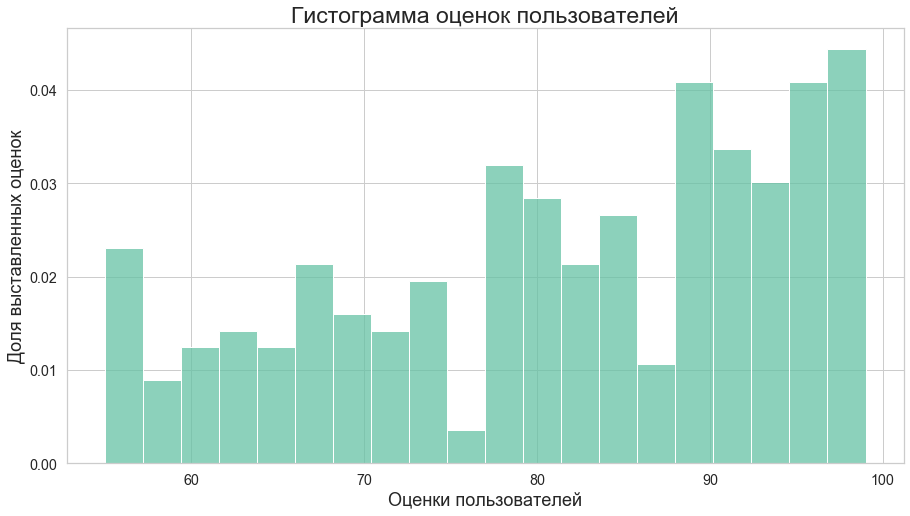

In [149]:
user_rating_hist()

**Вывод:** Большая часть оценок – хорошие, то есть сосредоточены в интервале $[80, 100]$.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [150]:
netflix_data['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

**Ответ:** Как видно из статистики медиана и мода почти не отличаются(всего лишь примерно на 2). Данные характеристики могут сильно отличаться в случае когда у нас, например, немного выборосов с большими значениями при этом, тогда медиана станет сильно больше, но при этом мода изменится не сильно.

В какие годы были запущены шоу, представленные в датасете?

In [151]:
years = netflix_data['release year'].drop_duplicates()
years = years.sort_values()
print("Шоу были запущены в следующих годах:", years.values)

Шоу были запущены в следующих годах: [1940 1976 1978 1982 1986 1987 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017]


Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

In [152]:
groups_by_year = netflix_data.sort_values(by='release year'). \
                     groupby('release year')['title'].count()

def count_students_to_mean():
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Распределение количества запущенных шоу в зависимости от года',
        fontsize = 20
    )
    axis.set_xlabel('Год', fontsize=20)
    axis.set_ylabel('Количество запущенных шоу', fontsize=20)
    axis.grid(ls=':')
    

    axis.plot(
        years,
        groups_by_year
    )
    plt.show()
    return 

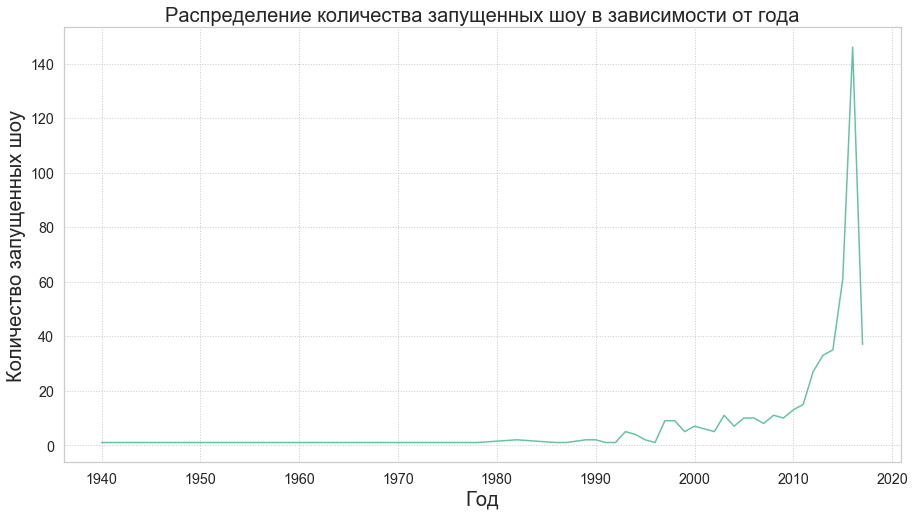

In [153]:
count_students_to_mean()

In [154]:
groups_by_year.describe()

count     35.000000
mean      14.285714
std       26.411418
min        1.000000
25%        2.000000
50%        7.000000
75%       11.000000
max      146.000000
Name: title, dtype: float64

**Вывод:** Наблюдается заметный рост количества запущенных шоу примерно с начала середины 90-ых. Межквартильный диапазон в данном случае $(11 - 2) = 9$, тогда все что вне $[2 - 9 * 1.5; 11 + 9 * 1.5]$ т.е. $[0; 24.5]$ формально можно считать выбросами. А еще смущает единственное шоу запущенное в 1940 году, его, кажется, тоже можно считать выбросом.

In [155]:
strange_film = netflix_data[netflix_data['release year'] == 1940].iloc[0, :]
netflix_data[netflix_data['release year'] == 1940].head()

,title,rating,ratingLevel,release year,user rating score
761,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0


Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? "Успешнее" означает, что пользователи в среднем ставили более высокие оценки.
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [156]:
netflix_data[['release year', 'user rating score']]. \
        groupby('release year').describe().loc[2016:2017,:]

user rating score                                                 \
                         count       mean        std   min    25%   50%   75%   
release year                                                                    
2016                      86.0  84.313953  12.599030  56.0  77.00  89.0  95.0   
2017                      16.0  88.125000   8.585841  71.0  81.75  90.5  94.0   

                    
               max  
release year        
2016          98.0  
2017          99.0

In [157]:
netflix_data[['release year', 'title']]. \
        groupby('release year').count().loc[2016:2017,:]

,title
release year,
2016,146
2017,37


**Вывод:** Нельзя утверждать, что 2017 стал успешнее для Netflix. Скорее можно утверждать обратное, обычного среднего не достаточно в данном случае. Как видно в 2016 в отличие от 2017 было запущено 146 против 37 новых шоу, при этом медиана оценок зрителей за 2016 всего на 1.5 меньше медианы в 2017, а это значит, что на самом деле количество шоу с оценками выше 89 сильно больше в 2016 году.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? [Подсказка](https://mipt-stats.gitlab.io/courses/ad_fivt/Jobs.jpg)

Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

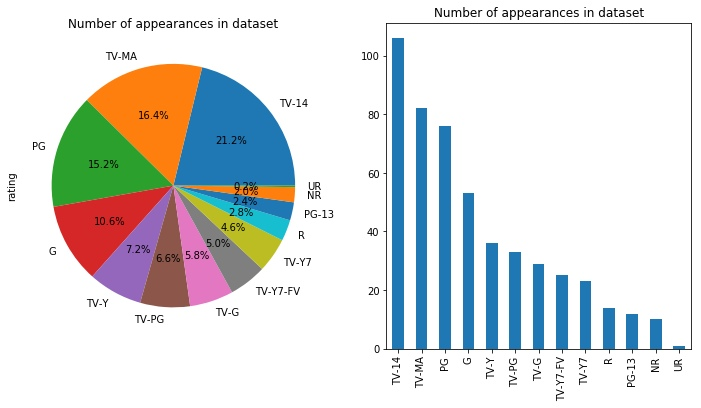

In [158]:
def show_rating_appearance():
    rating_to_appearance = netflix_data.groupby('rating')['title'].count()
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Количество шоу с данным рейтингом в данных',
        fontsize = 20
    )
    axis.set_ylabel('Название рейтинга', fontsize=20)
    
    axis.pie(
        rating_to_appearance.values,
        labels=rating_to_appearance.index,
        autopct='%1.1f%%'
    )
    axis.axis('equal')
    plt.show()
    return 

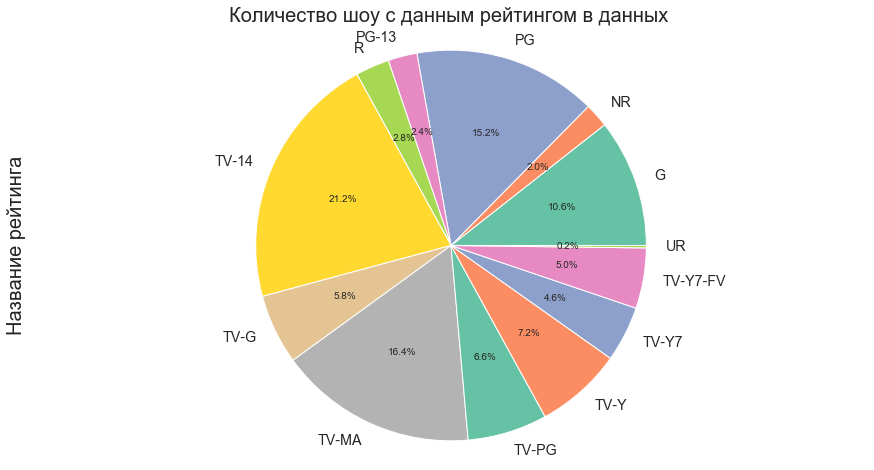

In [159]:
show_rating_appearance()

**Вывод:** Круговой график более интерпретируем. Среди шоу в датасете наиболее часто встречаются рейтинги `TV-14`, `TV-MA`, `PG`.

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится. Обозначим это шоу N.
Ответьте на следующие вопросы.
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [160]:
netflix_data.sort_values(by='user rating score', ascending=False).head(13)

,title,rating,ratingLevel,release year,user rating score
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
350,Lost,TV-14,Parents strongly cautioned. May be unsuitable ...,2010,98.0
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
64,Friends,TV-14,Parents strongly cautioned. May be unsuitable ...,2003,98.0
72,Orange Is the New Black,TV-MA,For mature audiences. May not be suitable for...,2016,98.0
27,The Flash,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
25,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
88,Finding Dory,PG,mild thematic elements,2016,98.0
62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
63,Criminal Minds,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0


In [161]:
# выберем сериал Ходячие мертвецы
walking_dead = netflix_data.sort_values(by='user rating score', ascending=False).iloc[12,:]
walking_dead

title                                                 The Walking Dead
rating                                                           TV-MA
ratingLevel          For mature audiences.  May not be suitable for...
release year                                                      2015
user rating score                                                   98
Name: 8, dtype: object

In [162]:
netflix_data[netflix_data['rating'] == walking_dead['rating']]. \
        sort_values(by='user rating score').head()

,title,rating,ratingLevel,release year,user rating score
380,Bitten,TV-MA,For mature audiences. May not be suitable for...,2016,56.0
442,Hap and Leonard,TV-MA,NaN,2016,57.0
447,The Doctor Blake Mysteries,TV-MA,For mature audiences. May not be suitable for...,2016,57.0
427,The Fall,TV-MA,For mature audiences. May not be suitable for...,2016,61.0
158,Brickleberry,TV-MA,For mature audiences. May not be suitable for...,2014,63.0


Как видно худшим по оценкам пользователей в рейтинговой группе `TV-MA` является сериал с названием `Bitten`.

In [163]:
shows_in_2015 = netflix_data[netflix_data['release year'] == 
                       walking_dead['release year']]
print('В одном году с Ходячими Мертвецами был выпущен',
      len(shows_in_2015), 'сериал')

В одном году с Ходячими Мертвецами был выпущен 61 сериал


In [164]:
before = shows_in_2015['user rating score'].describe()
before

count    32.000000
mean     82.750000
std      11.919082
min      56.000000
25%      71.750000
50%      83.500000
75%      93.250000
max      98.000000
Name: user rating score, dtype: float64

In [165]:
index = shows_in_2015[shows_in_2015['title'] 
                      == walking_dead['title']].index
shows_in_2015 = shows_in_2015.drop(index)
after = shows_in_2015['user rating score'].describe()
after

count    31.000000
mean     82.258065
std      11.781250
min      56.000000
25%      71.500000
50%      83.000000
75%      93.000000
max      98.000000
Name: user rating score, dtype: float64

In [166]:
print('Среднее изменилось примерно на', 
      "{0:.2f}".format(after['mean'] - before['mean']))

Среднее изменилось примерно на -0.49


Ответьте на следующие вопросы, проанализировав `boxplot`-график.
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет, за которые есть данные? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

In [167]:
def boxplot_last_years():
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    axis.set_title(
        'Зависимость оценок пользователей от рейтинговой группы шоу',
        fontsize = 20
    )
    sns.boxplot(
        data=netflix_data[netflix_data['release year'] > 
                          netflix_data['release year'].max() - 5],
        x='rating',
        y='user rating score',
        ax=axis
    )
    axis.set_xlabel('Имя рейтинговой группы', fontsize=20)
    axis.set_ylabel('Оценки пользователей', fontsize=20)
    plt.show()
    return 

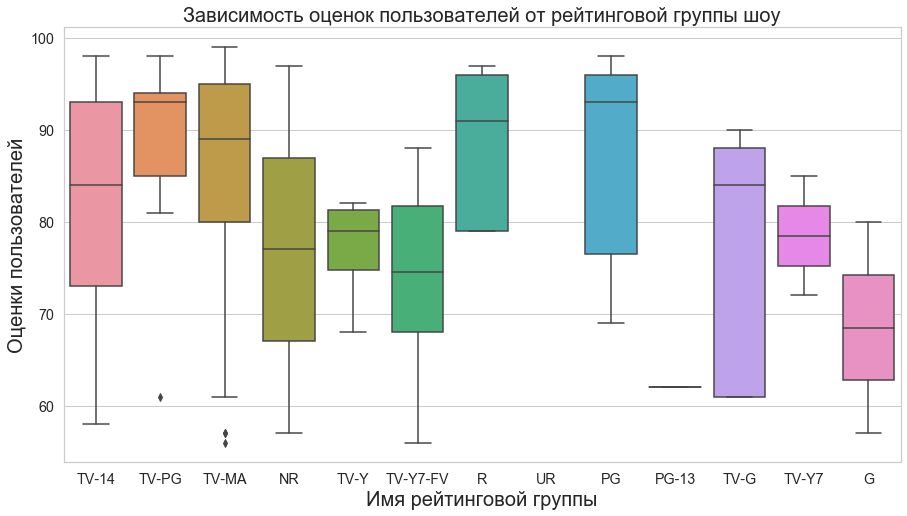

In [168]:
boxplot_last_years()

In [169]:
# странные шоу которые портят график
strange_films = netflix_data[netflix_data['release year'] <= 1980]
strange_films.head(10)

,title,rating,ratingLevel,release year,user rating score
252,Grease,PG,Parental guidance suggested. May not be suitab...,1978,86.0
506,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,1976,NaN
761,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0


In [170]:
def boxplot_decades():
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    axis.set_title(
        'Распределение оценок пользователей с ростом десятилетия',
        fontsize = 20
    )
    data_view = netflix_data
    data_view['decade'] = data_view['release year'] // 10 * 10
    data_view = data_view.drop(strange_films.index)
    sns.boxplot(
        data=data_view,
        x='decade',
        y='user rating score',
        ax=axis
    )
    axis.set_xlabel('Десятилетие', fontsize=20)
    axis.set_ylabel('Оценки пользователей', fontsize=20)
    plt.show()
    return 

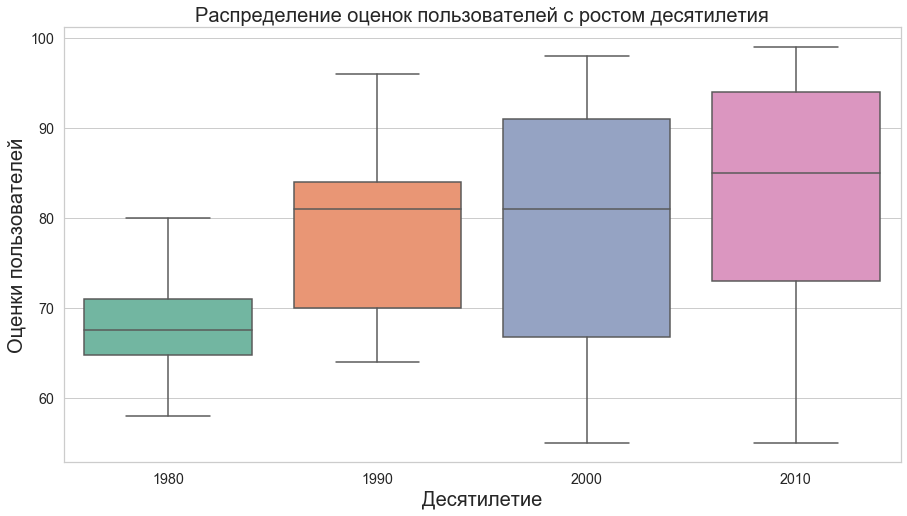

In [171]:
boxplot_decades()

**Вывод:** `Из первого` графика кажется, что скорее наиболее высоко люди оценивали шоу с рейтингом `TV-PG`, потому что как видим у его `boxplot` самая большая медиана и не такой большой межквартильный размах.
`Из второго` графика видим, что во-первых с каждым десятилетием медиана становится больше и при этом межквартильный размах увеличивается не так сильно, т.е. часть распределения, которая находится в интервале межквартильного размаха тоже сдвигается вверх.

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [172]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [173]:
videos_df_cut.head(3)

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944


In [174]:
video_cat_df = pd.merge(
    videos_df_cut,
    category,
    left_on='category_id',
    right_on='id',
    how='left'
)
del video_cat_df['id']
video_cat_df.head(3)

,trending_date,category_id,views,likes,dislikes,comment_count,name
0,14,22,62408,334,190,50,People & Blogs
1,14,22,330043,43841,2244,2977,People & Blogs
2,14,24,424596,49854,714,2944,Entertainment


Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [175]:
views_to_dates = video_cat_df.pivot_table(
    index='name', 
    columns='trending_date', 
    values='views',
    aggfunc='sum'
)
views_to_dates /= 10 ** 6
views_to_dates

trending_date,14,15,16,17,18,19,20,21
name,,,,,,,,
Autos & Vehicles,1.350890,2.076443,2.051608,1.386676,1.713087,1.736740,0.962761,1.421017
Comedy,2.310887,4.152389,4.156893,3.556025,3.806238,3.556578,5.648120,4.627423
Education,0.139723,0.028850,0.006963,0.146943,0.256076,0.310830,0.270585,0.186909
Entertainment,5.010384,5.289490,3.373346,12.299938,7.519942,5.877590,8.174020,4.585563
Film & Animation,0.636616,0.931837,1.160112,1.820958,2.725012,1.075440,2.574276,2.532978
Gaming,0.885597,1.609621,1.583149,0.557074,0.600307,0.193316,0.851814,0.981217
Howto & Style,2.191619,1.562421,0.129763,1.250164,1.468139,0.156958,1.402284,0.350009
Music,0.733907,1.585619,4.720464,9.179397,6.972429,1.329904,1.527219,0.809274
News & Politics,1.010044,1.225112,1.174092,1.251367,1.056007,1.028665,0.657263,1.214178


Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

In [176]:
def category_to_views_heatmap(table, vmin = None, vmax = None):
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    axis.set_title(
        'Зависимость количества просмотров от категории и дня в трендах',
        fontsize = 23
    )
    if vmin is not None and vmax is not None:
        sns.heatmap(table, annot=True, ax=axis, cmap="viridis",
                   vmin=vmin, vmax=vmax)
    else:
        sns.heatmap(table, annot=True, ax=axis, cmap="viridis")
    axis.set_xlabel("День нахождения в трендах", fontsize=18)
    axis.set_ylabel("Название категории", fontsize=18)
        
    return 

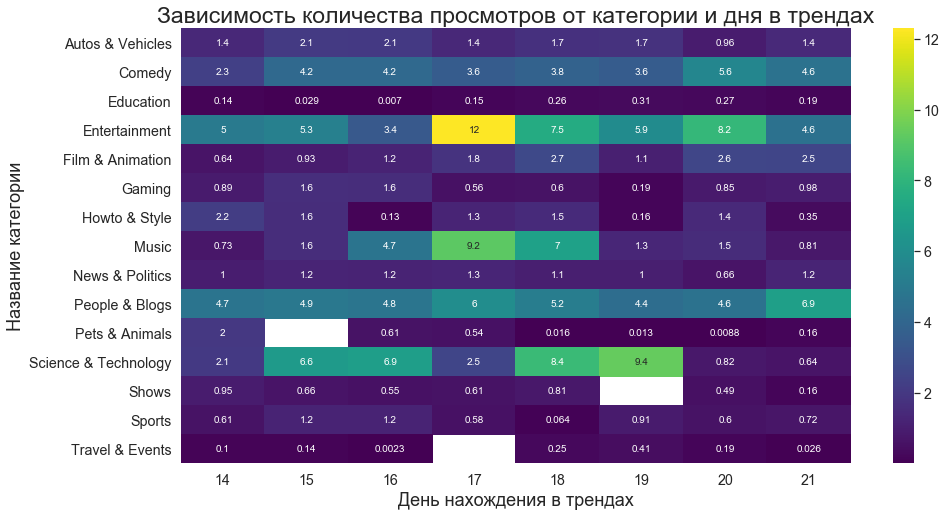

In [177]:
category_to_views_heatmap(views_to_dates)

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [178]:
views_to_date_with_all = pd.crosstab(
    video_cat_df['name'],
    video_cat_df['trending_date'], 
    values=video_cat_df['views'],
    aggfunc='sum',
    margins=True
)
views_to_date_with_all /= 10 ** 6
views_to_date_with_all.rename(columns={'All': 'Views overall'},
                              index={'All': 'Views overall'},
                              inplace=True)
views_to_date_with_all

trending_date,14,15,16,17,18,19,20,21,Views overall
name,,,,,,,,,
Autos & Vehicles,1.350890,2.076443,2.051608,1.386676,1.713087,1.736740,0.962761,1.421017,12.699222
Comedy,2.310887,4.152389,4.156893,3.556025,3.806238,3.556578,5.648120,4.627423,31.814553
Education,0.139723,0.028850,0.006963,0.146943,0.256076,0.310830,0.270585,0.186909,1.346879
Entertainment,5.010384,5.289490,3.373346,12.299938,7.519942,5.877590,8.174020,4.585563,52.130273
Film & Animation,0.636616,0.931837,1.160112,1.820958,2.725012,1.075440,2.574276,2.532978,13.457229
Gaming,0.885597,1.609621,1.583149,0.557074,0.600307,0.193316,0.851814,0.981217,7.262095
Howto & Style,2.191619,1.562421,0.129763,1.250164,1.468139,0.156958,1.402284,0.350009,8.511357
Music,0.733907,1.585619,4.720464,9.179397,6.972429,1.329904,1.527219,0.809274,26.858213
News & Politics,1.010044,1.225112,1.174092,1.251367,1.056007,1.028665,0.657263,1.214178,8.616728


В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

Из-за того что цветовая гамма автоматически подстроилась под минимальное и максимальное значения, то из-за пары больших и маленьких значений все остальные сливаются и не видно разницы между даже сильно разными клетками таблицы.

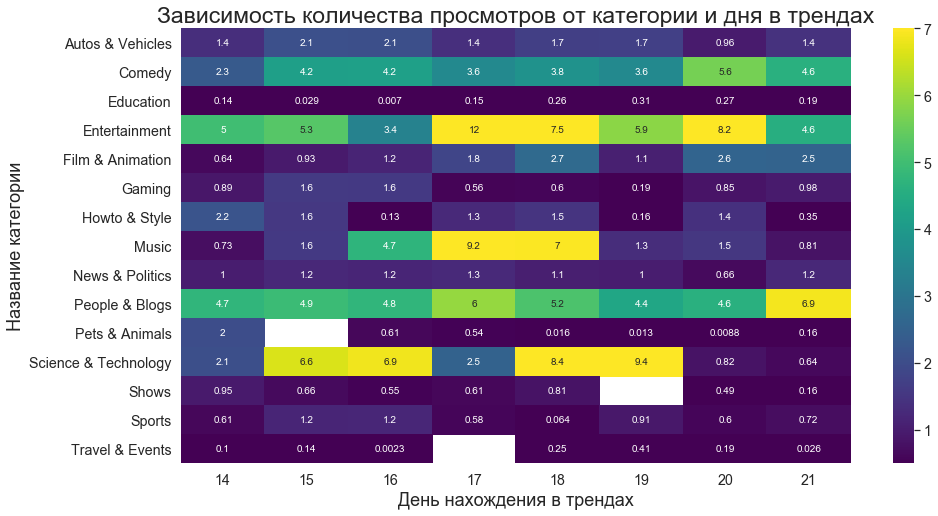

In [179]:
category_to_views_heatmap(views_to_dates,
                         vmin=0.5, vmax=7)

По заданию не до конца ясно, что именно мы исследуем, но если бы хотели посчитать самую популярную категорию за этот промежуток времени, то тогда следуя подсказке нагляднее всего было бы изобразить это на  графике `pie chart`, как мы сделали это в задании про `Netflix`, где нужно было проанализировать распределение шоу по рейтинговым группам. Сделаем это:

In [180]:
video_cat_df.head(3)

,trending_date,category_id,views,likes,dislikes,comment_count,name
0,14,22,62408,334,190,50,People & Blogs
1,14,22,330043,43841,2244,2977,People & Blogs
2,14,24,424596,49854,714,2944,Entertainment


In [181]:
def show_most_viewed_category():
    groups = video_cat_df.groupby('name')
    result = groups['views'].sum()

    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Общее количество просмотров разных категорий в период 14-21 Nov 2017',
        fontsize = 20
    )
    axis.set_ylabel('Название категории видео', fontsize=20)
    
    axis.pie(
        x=result.values,
        labels=result.index,
        autopct='%1.1f%%'
    )
    axis.axis('equal')
    plt.show()
    return 

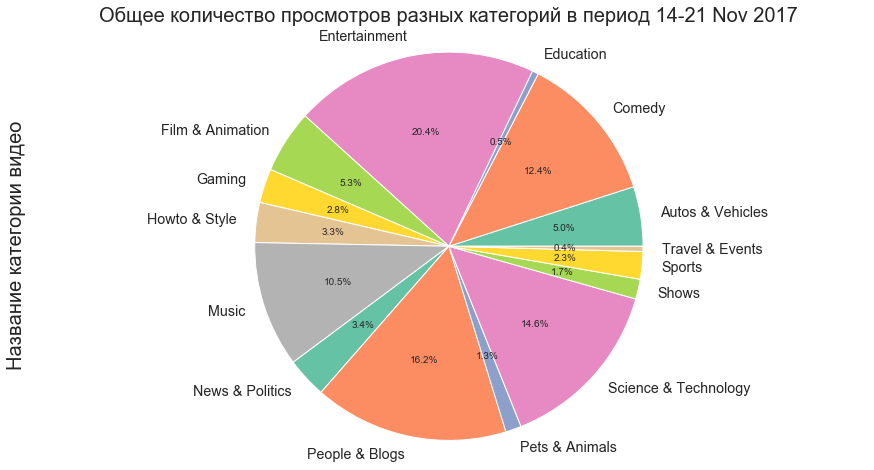

In [182]:
show_most_viewed_category()

**Вывод:** Наибольшей популярностью пользуются (в порядке убывания популярности) следующие категории:
1. `Entertainment`
2. `People and Blogs`
3. `Science`

Конечно, так как проанализирован только небольшой промежуток времени нельзя сказать что рейтинг популярности всегда такой.

---

### Задача 5

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

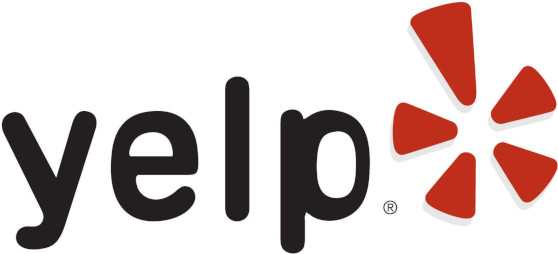

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [183]:
yelp_data = pd.read_csv('yelp_business.csv', sep=',', index_col=0)
yelp_data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [184]:
print('Размер датасета', len(yelp_data))
yelp_data.isna().sum() # посмотрим есть ли пропуски в наших данных

Размер датасета 174567


business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
is_open              0
categories           0
dtype: int64

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [185]:
cities_to_comp = yelp_data[['city', 'business_id']].groupby('city').count()
cities_to_comp = cities_to_comp.sort_values(by='business_id', ascending=False)
cities_to_comp.head()

,business_id
city,
Las Vegas,26775
Phoenix,17213
Toronto,17206
Charlotte,8553
Scottsdale,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [186]:
LAS_VEGAS = cities_to_comp.iloc[0, :]
LAS_VEGAS

business_id    26775
Name: Las Vegas, dtype: int64

In [187]:
las_vegas_comp = yelp_data[yelp_data['city'] == LAS_VEGAS.name]

def visualize_la_companies(xlims=None, ylims=None):
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(16, 10)
    
    axis.set_title(
        'Расположение компаний в городе Las Vegas',
        fontsize = 20
    )
    axis.set_xlabel('Долгота', fontsize=20)
    axis.set_ylabel('Широта', fontsize=20)
    axis.grid(ls=':')
    if xlims is not None and ylims is not None:
        axis.set_xlim(xlims)
        axis.set_ylim(ylims)

    axis.scatter(
        las_vegas_comp['longitude'],
        las_vegas_comp['latitude']
    )
    plt.show()
    return 

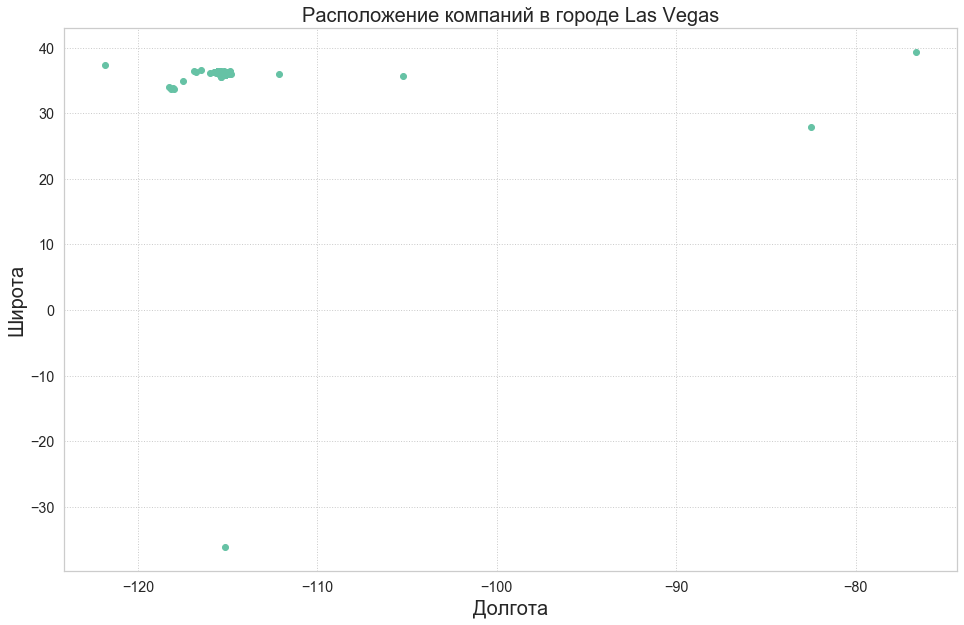

In [188]:
visualize_la_companies()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком. Попробуйте также для графиков в этой задаче автоматически подгружать карту города в качестве фона графика, используя <a href="https://plotly.com/python/scattermapbox/">примеры</a>.

*Замечание. Если у вас возникает ошибка `Notebook validation failed`, попробуйте открыть ноутбук текстовым редактором и в самом конце заменить `"nbformat_minor": 1` на `"nbformat_minor": 4`.*

In [189]:
latitude = las_vegas_comp['latitude'].describe()
longitude = las_vegas_comp['longitude'].describe()
IQR_x = (longitude['75%'] - longitude['25%']) * 1.5
IQR_y = (latitude['75%'] - latitude['25%']) * 1.5
XLIMS = (longitude['25%'] - IQR_x, longitude['75%'] + IQR_x)
YLIMS = (latitude['25%'] - IQR_y, latitude['75%'] + IQR_y)
XLIMs = (-115.4,-115.0)
YLIMs = (36.0, 36.3)


print(XLIMS, YLIMS)

(-115.40162875475002, -114.99615020874998) (36.003186803500014, 36.2578629275)


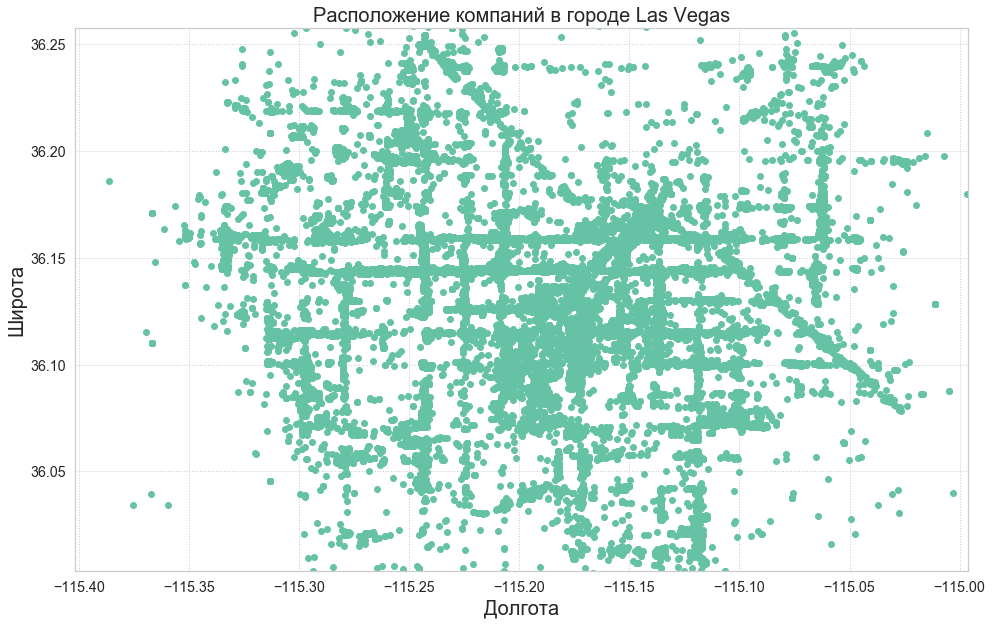

In [190]:
visualize_la_companies(xlims=XLIMS, ylims=YLIMS)

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [191]:
yelp_review = pd.read_csv('yelp_review.csv', sep=',', index_col=0)
print(len(yelp_review))
yelp_review.head()

/Users/mikhail/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


5261668


,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [192]:
yelp_review.set_index('business_id', inplace=True)
print("Всего компаний в таблице:", len(yelp_review))
yelp_review = yelp_review.loc[las_vegas_comp['business_id'], :]
print("Компаний в Лас-Вегасе", len(yelp_review))
yelp_review.reset_index(inplace=True)
yelp_review.head()

Всего компаний в таблице: 5261668
Компаний в Лас-Вегасе 1604227


,business_id,stars
0,kCoE3jvEtg6UVz5SOD3GVw,4
1,kCoE3jvEtg6UVz5SOD3GVw,1
2,kCoE3jvEtg6UVz5SOD3GVw,5
3,kCoE3jvEtg6UVz5SOD3GVw,5
4,kCoE3jvEtg6UVz5SOD3GVw,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [193]:
stars_data = yelp_review.groupby('business_id'). \
            aggregate(['mean', 'count']). \
            sort_values(('stars', 'count'), ascending=False)
stars_data.head()

stars      
                            mean count
business_id                           
4JNXUYY8wbaaDmk3BPzlWw  4.120484  7362
RESDUcs7fIiihp38-d6_6g  3.770340  7006
K7lWdNUhCbcnEvI0NhGewg  3.697362  5951
cYwJA2A6I12KNkm2rtXd5g  3.893722  5448
DkYS3arLOhA8si5uUEmHOw  4.268994  4870

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша.

In [194]:
stars_data.columns

MultiIndex([('stars',  'mean'),
            ('stars', 'count')],
           )

In [195]:
stars_data.columns = stars_data.columns.to_flat_index()
stars_data = stars_data.rename(columns={('stars', 'mean'): 'avg_rating', 
                   ('stars', 'count'): 'reviews_cnt'})
stars_data.head()

,avg_rating,reviews_cnt
business_id,,
4JNXUYY8wbaaDmk3BPzlWw,4.120484,7362
RESDUcs7fIiihp38-d6_6g,3.770340,7006
K7lWdNUhCbcnEvI0NhGewg,3.697362,5951
cYwJA2A6I12KNkm2rtXd5g,3.893722,5448
DkYS3arLOhA8si5uUEmHOw,4.268994,4870


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [196]:
las_vegas_comp.head(2)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.26846,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.24966,1,Shopping;Sporting Goods


In [197]:
new_las_vegas = las_vegas_comp.set_index('business_id')
new_las_vegas.head(2)

,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
business_id,,,,,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.26846,1,Real Estate Services;Real Estate;Home Services...
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.24966,1,Shopping;Sporting Goods


In [198]:
new_las_vegas.drop(columns=['neighborhood', 'address', 
                    'city', 'state', 'postal_code', 
                    'is_open'], inplace=True)
new_las_vegas.head(2)

,name,latitude,longitude,categories
business_id,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",36.207430,-115.26846,Real Estate Services;Real Estate;Home Services...
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",36.197484,-115.24966,Shopping;Sporting Goods


In [199]:
df_joined = pd.merge(new_las_vegas, stars_data, 
         left_on='business_id',
        right_on='business_id', how='inner')
df_joined.head()

,name,latitude,longitude,categories,avg_rating,reviews_cnt
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,4.000000,5
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",36.197484,-115.249660,Shopping;Sporting Goods,1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20
DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [200]:
def visualize_la_companies_colour(xlims=None, ylims=None):
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(16, 10)
    
    axis.set_title(
        'Расположение компаний в городе Las Vegas',
        fontsize = 20
    )
    axis.set_xlabel('Долгота', fontsize=20)
    axis.set_ylabel('Широта', fontsize=20)
    axis.grid(ls=':')
    if xlims is not None and ylims is not None:
        axis.set_xlim(xlims)
        axis.set_ylim(ylims)

    axis.scatter(
        x=df_joined['longitude'],
        y=df_joined['latitude'],
        c=df_joined['avg_rating'],
        cmap='viridis',
        alpha=0.3
    )
    plt.show()
    return 

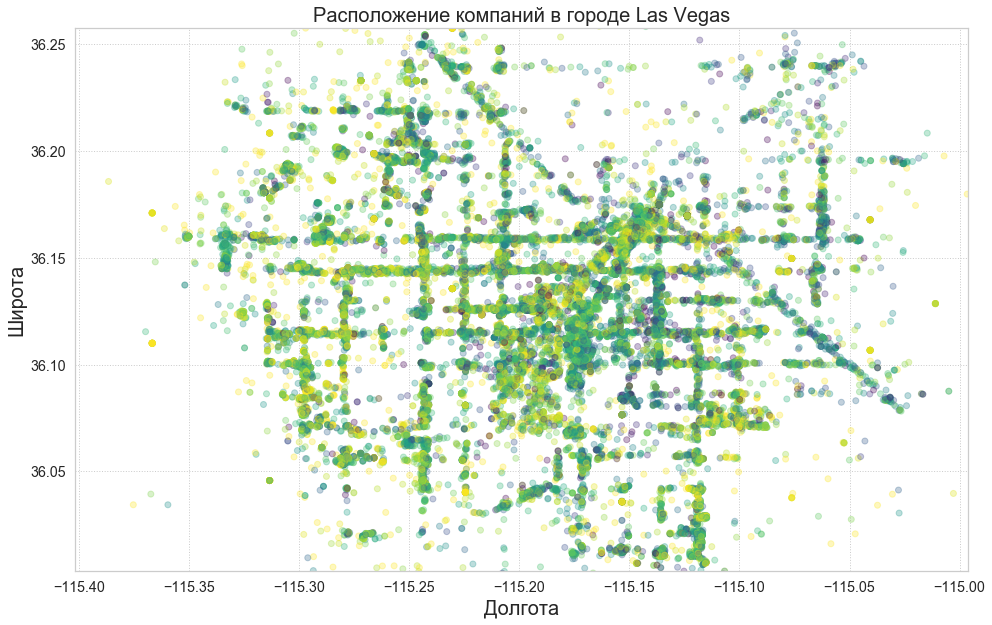

In [201]:
visualize_la_companies_colour(xlims=XLIMS, ylims=YLIMS)

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [202]:
df_joined['rounded_lat'] = \
        np.round(df_joined['latitude'] * 4, decimals=1) * 0.25
df_joined['rounded_long'] = \
        np.round(df_joined['longitude'] * 4, decimals=1) * 0.25
df_joined.head()

,name,latitude,longitude,categories,avg_rating,reviews_cnt,rounded_lat,rounded_long
business_id,,,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,4.000000,5,36.200,-115.275
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",36.197484,-115.249660,Shopping;Sporting Goods,1.444444,9,36.200,-115.250
VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23,36.075,-115.125
1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20,36.050,-115.275
DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25,36.100,-115.050


Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [203]:
districts = pd.pivot_table(
    data=df_joined,
    index='rounded_long', 
    columns='rounded_lat', 
    values='avg_rating',
    aggfunc='mean', dropna=True
)
districts.head()

rounded_lat,-36.075,27.950,33.700,33.775,33.800,34.050,34.900,35.600,35.625,35.925,...,36.300,36.325,36.350,36.375,36.400,36.425,36.450,36.550,37.375,39.300
rounded_long,,,,,,,,,,,,,,,,,,,,,
-121.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
-118.250,NaN,NaN,NaN,NaN,NaN,4.909091,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-118.175,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-118.075,NaN,NaN,NaN,NaN,3.928571,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-118.000,NaN,NaN,4.588235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
def districts_heatmap(pivot_table, vmin=None, vmax=None):
    fig, axis = plt.subplots(1, 1)
    fig.set_size_inches(16, 12)
    axis.set_title(
        'Средняя оценка компаний по каждому району',
        fontsize = 23
    )
    if vmin is not None and vmax is not None:
        sns.heatmap(pivot_table, annot=True, 
                    ax=axis, cmap="viridis")
    else: 
        sns.heatmap(pivot_table, annot=True, 
                    ax=axis, cmap="viridis",
                    vmin=vmin, vmax=vmax)
    
    axis.set_xlabel("Долгота", fontsize=18)
    axis.set_ylabel("Широта", fontsize=18)
        
    return 

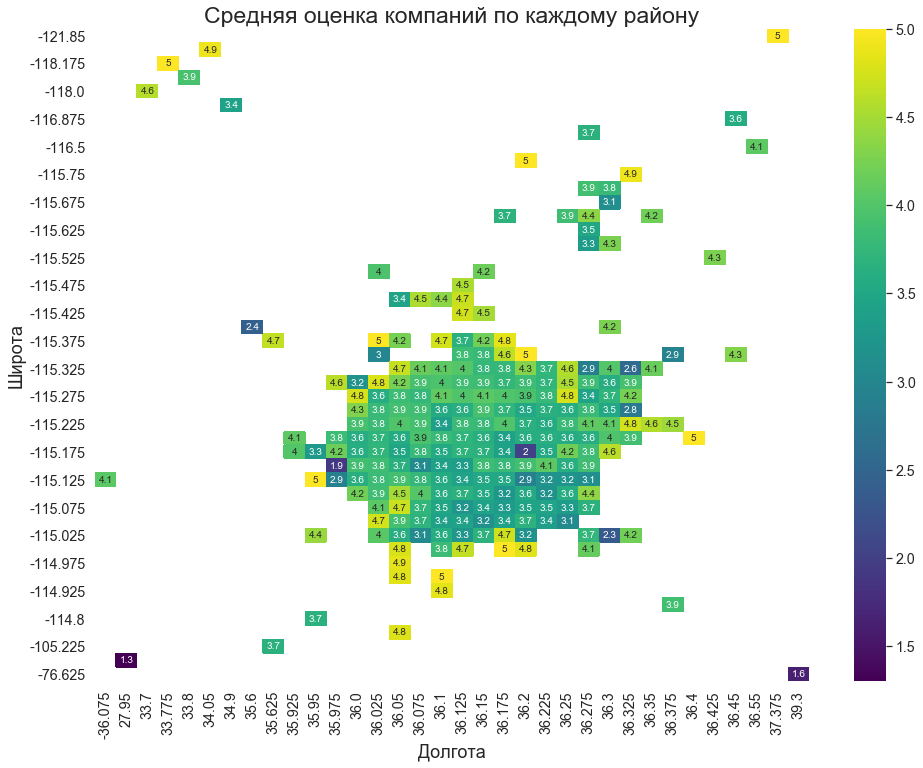

In [205]:
districts_heatmap(districts)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 
1. Если в районе мало компаний, то среднее не будет давать полезной информации, ведь значение может оказаться сильно заниженным, даже если есть хорошие компании или наоборот слишком высоким. Например как мы видим достаточно далеко от центра есть районы с оценками $>=4.9$, сверху я насчитал 5 таких.

2. Из-за того что цвета автоматически подстраиваются под максимум и минимум получается, что районы, которые отличаются по средней оценке $<1 балл$, что на самом деле достаточно существенно, отображаются очень похожими и  сливающимися цветами, что может помешать правильному пониманию. Хотя при этом у нас всего лишь 4 района где средний балл $<=2$, и они так сильно все портят.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [206]:
groups = df_joined.groupby(['rounded_lat', 'rounded_long'])
fixed = groups[['avg_rating', 'name']]. \
            agg({'avg_rating' : 'mean', 'name' : 'count'})
fixed.reset_index(inplace=True)
fixed.head()

,rounded_lat,rounded_long,avg_rating,name
0,-36.075,-115.125,4.055556,1
1,27.950,-82.450,1.303411,1
2,33.700,-118.000,4.588235,1
3,33.775,-118.175,5.000000,1
4,33.800,-118.075,3.928571,1


In [207]:
fixed = fixed[fixed['name'] >= 30]
fixed

,rounded_lat,rounded_long,avg_rating,name
25,36.000,-115.200,3.613502,95
26,36.000,-115.175,3.612390,48
27,36.000,-115.150,3.880770,92
28,36.000,-115.125,3.636286,190
34,36.025,-115.275,3.604171,77
...,...,...,...,...
197,36.275,-115.275,3.440686,253
198,36.275,-115.250,3.813771,174
200,36.275,-115.200,3.624407,114
213,36.300,-115.300,3.603907,54


In [208]:
fixed_districts = pd.pivot_table(
    data=fixed,
    index='rounded_long', 
    columns='rounded_lat', 
    values='avg_rating',
    # не важно какую функцию выбирать, 
    # потому что я уже сгруппировал по широте и долготе
    aggfunc='max', dropna=True  
)
fixed_districts.head()

rounded_lat,36.000,36.025,36.050,36.075,36.100,36.125,36.150,36.175,36.200,36.225,36.250,36.275,36.300
rounded_long,,,,,,,,,,,,,
-115.350,NaN,NaN,NaN,NaN,NaN,NaN,3.798717,NaN,NaN,NaN,NaN,NaN,NaN
-115.325,NaN,NaN,NaN,NaN,4.079151,4.014740,3.761566,3.768158,NaN,3.736818,NaN,NaN,NaN
-115.300,NaN,NaN,4.221316,3.915432,3.960299,3.861584,3.856802,3.749356,3.856580,3.715144,NaN,3.851625,3.603907
-115.275,NaN,3.604171,3.842713,3.767066,4.095504,3.980037,4.057817,3.976666,3.937024,3.781062,NaN,3.440686,3.700732
-115.250,NaN,3.794697,3.901902,3.872547,3.560315,3.620665,3.904714,3.728783,3.524636,3.656214,3.604008,3.813771,NaN


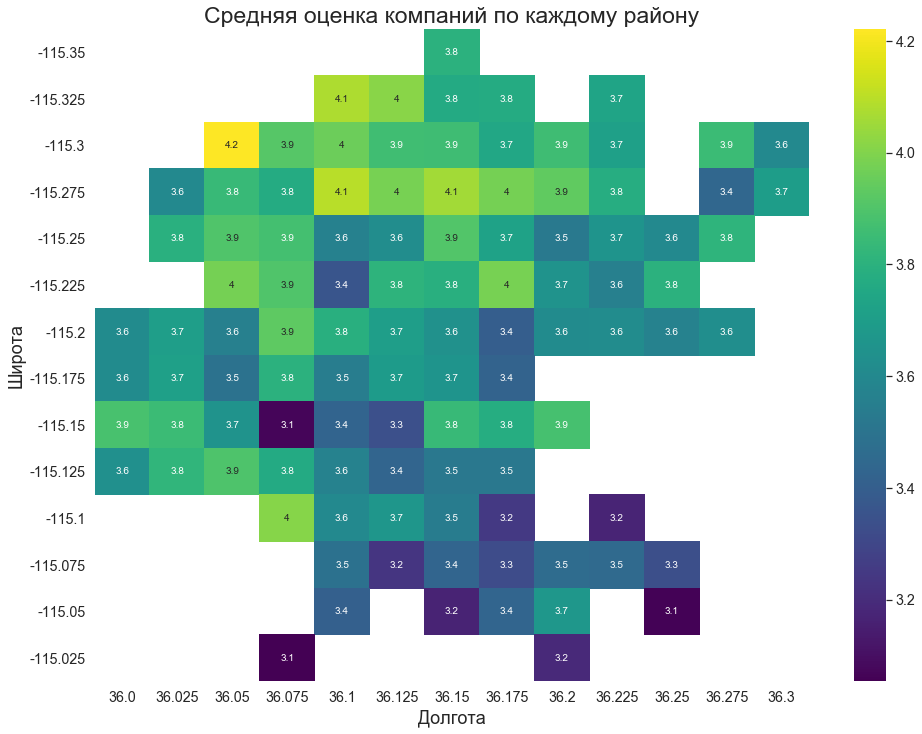

In [209]:
districts_heatmap(fixed_districts, vmin=3.0, vmax=4.3)

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Исчезли районы на окраинах города, графки стал кучнее, более явно по цветам видны различия между районами с разным баллом. Общую картину стало видно намного лучше.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [210]:
regexp = r'[r,R][E,e][S,s][T,t][A,a]'+ \
        '[U,u][R,r][A,a][N,n][T,t]'
mask = df_joined['categories'].str.contains(regexp, na=False, regex=True)
restaurants = df_joined.loc[mask]
restaurants.head()


,name,latitude,longitude,categories,avg_rating,reviews_cnt,rounded_lat,rounded_long
business_id,,,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",36.066914,-115.170848,Nightlife;Bars;Barbeque;Sports Bars;American (...,3.769231,13,36.075,-115.175
4srfPk1s8nlm1YusyDUbjg,"""Subway""",36.064652,-115.118954,Fast Food;Restaurants;Sandwiches,2.666667,6,36.075,-115.125
n7V4cD-KqqE3OXk0irJTyA,"""GameWorks""",36.068259,-115.178877,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.117479,349,36.075,-115.175
F0fEKpTk7gAmuSFI0KW1eQ,"""Cafe Mastrioni""",36.111057,-115.241688,Italian;Restaurants,1.666667,3,36.100,-115.250
Wpt0sFHcPtV5MO9He7yMKQ,"""McDonald's""",36.130013,-115.109310,Restaurants;Fast Food;Burgers,2.150000,20,36.125,-115.100


In [211]:
restaurants = restaurants[restaurants['reviews_cnt'] >= 5]
restaurants.head()

,name,latitude,longitude,categories,avg_rating,reviews_cnt,rounded_lat,rounded_long
business_id,,,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",36.066914,-115.170848,Nightlife;Bars;Barbeque;Sports Bars;American (...,3.769231,13,36.075,-115.175
4srfPk1s8nlm1YusyDUbjg,"""Subway""",36.064652,-115.118954,Fast Food;Restaurants;Sandwiches,2.666667,6,36.075,-115.125
n7V4cD-KqqE3OXk0irJTyA,"""GameWorks""",36.068259,-115.178877,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.117479,349,36.075,-115.175
Wpt0sFHcPtV5MO9He7yMKQ,"""McDonald's""",36.130013,-115.109310,Restaurants;Fast Food;Burgers,2.150000,20,36.125,-115.100
W1Yr6c2XDx_RBjb6WsV-aQ,"""Divine Cafe at the Springs Preserve""",36.170706,-115.190288,Restaurants;Cafes;American (New);Bars;Nightlif...,4.050000,140,36.175,-115.200


In [212]:
groups = restaurants.groupby(['rounded_lat', 'rounded_long'])
fixed_rest = groups[['avg_rating', 'name']]. \
            agg({'avg_rating' : 'mean', 'name' : 'count'})
fixed_rest.reset_index(inplace=True)
fixed_rest.head()

,rounded_lat,rounded_long,avg_rating,name
0,35.925,-115.175,4.744681,1
1,35.975,-115.200,2.787387,4
2,35.975,-115.175,2.833333,1
3,35.975,-115.150,1.906977,1
4,36.000,-115.250,3.778846,1


In [213]:
fixed_rest = fixed_rest[fixed_rest['name'] >= 10]
fixed_rest

,rounded_lat,rounded_long,avg_rating,name
5,36.000,-115.200,3.051821,26
6,36.000,-115.175,3.635620,14
7,36.000,-115.150,3.593600,17
8,36.000,-115.125,3.556732,37
11,36.025,-115.275,3.043214,16
...,...,...,...,...
128,36.250,-115.050,2.799465,12
131,36.275,-115.275,3.366594,49
132,36.275,-115.250,3.480259,41
133,36.275,-115.200,3.153953,30


In [214]:
fixed_rest_districts = pd.pivot_table(
    data=fixed_rest,
    index='rounded_long', 
    columns='rounded_lat', 
    values='avg_rating',
    # не важно какую функцию выбирать, 
    # потому что я уже сгруппировал по широте и долготе
    aggfunc='max', dropna=True  
)
fixed_districts.head()

rounded_lat,36.000,36.025,36.050,36.075,36.100,36.125,36.150,36.175,36.200,36.225,36.250,36.275,36.300
rounded_long,,,,,,,,,,,,,
-115.350,NaN,NaN,NaN,NaN,NaN,NaN,3.798717,NaN,NaN,NaN,NaN,NaN,NaN
-115.325,NaN,NaN,NaN,NaN,4.079151,4.014740,3.761566,3.768158,NaN,3.736818,NaN,NaN,NaN
-115.300,NaN,NaN,4.221316,3.915432,3.960299,3.861584,3.856802,3.749356,3.856580,3.715144,NaN,3.851625,3.603907
-115.275,NaN,3.604171,3.842713,3.767066,4.095504,3.980037,4.057817,3.976666,3.937024,3.781062,NaN,3.440686,3.700732
-115.250,NaN,3.794697,3.901902,3.872547,3.560315,3.620665,3.904714,3.728783,3.524636,3.656214,3.604008,3.813771,NaN


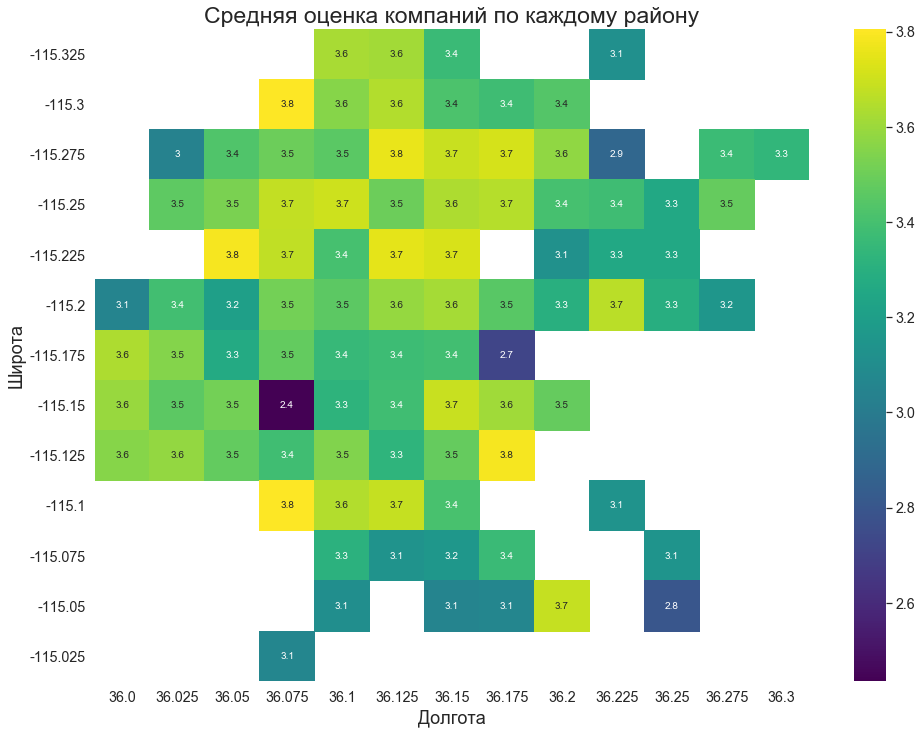

In [215]:
districts_heatmap(fixed_rest_districts)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** 
1. Ограничения на количество отзывов для ресторана помогает рассматривать только ресторана, которые хоть как-то проверены посетителями, а не только открылись, или открылись давно но в них никто не ходит.

2. Ограничение на количество ресторанов в районе помогает не рассматривать районы с маленьким количеством ресторанов, потому что в них может быть слишком высокое или слишком низкое среднее, что ухудшит читаемость графика.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [216]:
rest_prefered = restaurants[restaurants['reviews_cnt'] >= 50]
rest_prefered = rest_prefered.sort_values(
    by='avg_rating', 
    ascending=False
)
rest_prefered.reset_index(inplace=True)
rest_prefered.head(5)

,business_id,name,latitude,longitude,categories,avg_rating,reviews_cnt,rounded_lat,rounded_long
0,iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...,4.966480,179,36.125,-115.175
1,Fmij544FE1iOruoxI41kew,"""Pepito Shack""",36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,4.907692,65,36.150,-115.150
2,qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,4.890909,55,36.125,-115.175
3,k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...,4.868132,91,36.175,-115.275
4,IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,4.848069,1165,36.050,-115.250


In [217]:
rest_prefered = rest_prefered.drop(
    columns=['business_id', 'rounded_lat','rounded_long'])
print(len(rest_prefered))
rest_prefered.head(10)

2838


,name,latitude,longitude,categories,avg_rating,reviews_cnt
0,"""Lip Smacking Foodie Tours""",36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...,4.966480,179
1,"""Pepito Shack""",36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,4.907692,65
2,"""Bosa Boba Cafe""",36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,4.890909,55
3,"""Garden Grill""",36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...,4.868132,91
4,"""Brew Tea Bar""",36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,4.848069,1165
5,"""Poppa Naps BBQ""",36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,4.836538,104
6,"""Zenaida's Cafe""",36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes,4.833333,180
7,"""El Frescos Cocina Mexicana""",36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...,4.816754,191
8,"""Blaqcat Ultra Hookah Lounge""",36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...,4.809524,63
9,"""California Sushi Burrito""",36.125636,-115.202487,Asian Fusion;Fast Food;Restaurants;Japanese;Po...,4.807018,57


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [218]:
top_10 = rest_prefered[rest_prefered.index < 10]
high_ranked = rest_prefered[rest_prefered['avg_rating'] >= 4.7]
high_ranked = high_ranked.drop(top_10.index)
len(high_ranked)
high_ranked.head(2)

,name,latitude,longitude,categories,avg_rating,reviews_cnt
10,"""Smooth Eats""",36.167894,-115.140238,Juice Bars & Smoothies;Restaurants;Sandwiches;...,4.807018,57
11,"""Meraki Greek Grill""",36.098578,-115.242440,Restaurants;Greek,4.797546,326


In [219]:
def visualize_la_rest_color(xlims=None, ylims=None):
    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        fig, axis = plt.subplots(1, 1)
        fig.set_size_inches(16, 10)

        axis.set_title(
            'Расположение ресторанов с рейтингом выше 4.7 в Las Vegas',
            fontsize = 20
        )
        axis.set_xlabel('Долгота', fontsize=20)
        axis.set_ylabel('Широта', fontsize=20)
        axis.grid(ls=':')

        axis.scatter(
            x=high_ranked['longitude'],
            y=high_ranked['latitude'],
            linewidths=4,
            label='Рестораны с рейтингом не меньше чем 4.7'
        )
        axis.scatter(
            x=top_10['longitude'],
            y=top_10['latitude'],
            linewidths=4,
            label='Рестораны из топ-10'
        )

        plt.legend()
        plt.show()
        return 

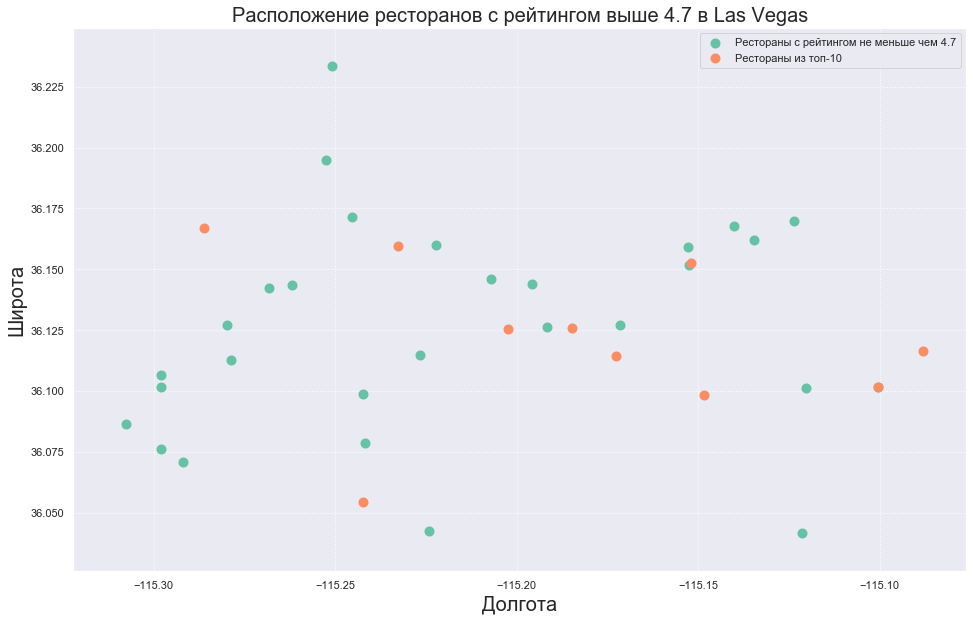

In [220]:
visualize_la_rest_color()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий поступает правильно отсеивая рестораны с мальеньким количеством отзывов. Видимо, лучшей характеристикой для него будет то, что он умный...

`Общий вывод по задаче` нам следует делать так же как Василий при построении графиков, так как средний балл ресторана у которого мало отзывов мало о чем говорит нам и скорее неинформативен. Его стоит удалять из рассмотрения. 